# Solve 1D advection-diffusion equation with constant source

We would like to solve the 1D advection-diffusion equation with a constant source as a precursor to solving the advection-diffusion equation for temperature in a molten salt reactor with a heat source that is a function of the neutron fission distribution. Possible boundary conditions for the temperature might be a Dirichlet condition at the inlet with a zero Neumann condition at the outlet, e.g. all heat flux at the outlet is do to advection. I'll have to check and see if that's consistent with the Cammi paper.

## Dirichlet conditions at inlet and outlet

In [1]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff(y,x,2) + diff(y,x) == 1
desolve(de, y, [0, 0, 1, 1])

x

In [ ]:
desolve(de, y, [0, 1, 1, 2])

## Dirichlet condition at inlet and Neumann zero at outlet

In [2]:
f = desolve(de, y)
print(f)

_K1*e^x + _K2 + x + 1


In [ ]:
type(f)

In [ ]:
f(10)

In [ ]:
f(x=10)

In [3]:
fprime = diff(f,x)
print(fprime)

_K1*e^x + 1


In [30]:
solve(fprime == 0, _K1)

[_K1 == -e^(-x)]

In [23]:
sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

sol2 = solve([g(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

_K2 + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
x + e^(-1) - e^(x - 1)


In [23]:
sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

sol2 = solve([g(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

_K2 + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
x + e^(-1) - e^(x - 1)


In [15]:
hprime = h.diff(x)
hpp = hprime.diff(x)
print(hprime)
print(hpp)

-e^(x - 1) + 1
-e^(x - 1)


In [17]:
-hpp + hprime - 1

0

In [18]:
print(h(x=0).simplify())
print(h(x=0).expand())

-(e - 1)*e^(-1) - e^(-1) + 1
0


In [21]:
print(h(x=1))
print(h(x=1).expand())
print(h(x=1).n())

-(e - 1)*e^(-1) + 1
e^(-1)
0.367879441171442


In [8]:
p = plot(h, (0, 1))

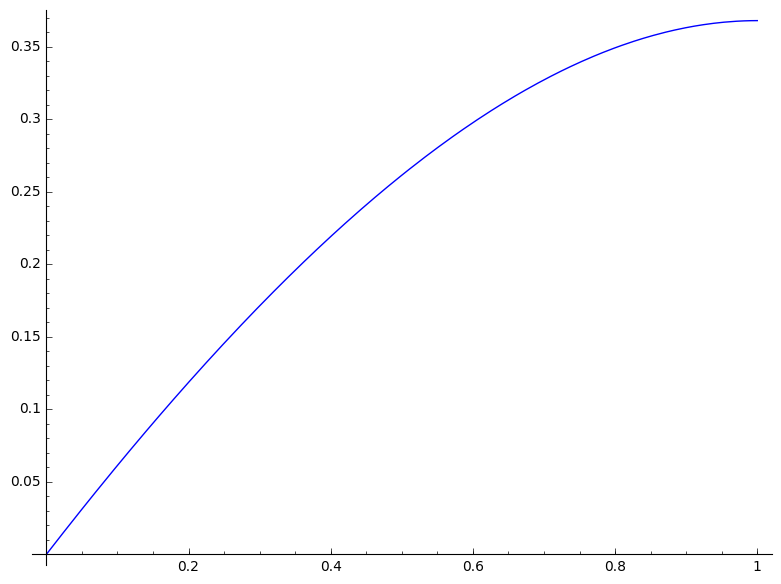

In [9]:
show(p)

## Neumann condition at inlet and outlet

In [27]:
sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

_K2 + x - e^(x - 1) + 1


In [29]:
gprime = g.diff(x)
print(gprime)
print(gprime(x=1))

-e^(x - 1) + 1
0


As indicated by the cell above and below, it is literally **impossible to impose a Neumann condition at both inlet and outlet** for the advection-diffusion problem because one condition specifies K1, but K2 vanishes after differentiation so it cannot be specified by imposing a Neumann condition. So Riveria must have been smoking some crack when she wrote those two conditions down.

In [25]:
sol2 = solve([gprime(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

IndexError: list index out of range

# Scratch

In [ ]:
fprime(x=1)

In [ ]:
expr = (fprime(x=1) - 1) / e
print(expr)

In [ ]:
type(expr)

In [ ]:
type(x)

In [ ]:
x = var('x')
type(x)

In [ ]:
_K1, K1 = var('_K1 K1')

In [ ]:
solve(expr, _K1)